<a href="https://colab.research.google.com/github/enriqueasegura/Exercises/blob/master/KVec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import astropy
from google.colab import files

"""
Notes from Prof. Terebey: 

Here is the task: 
1. Make a graph of velocity (in km/s) versus distance from a star (in astronomical units), 
of the Keplerian velocity that objects(planets) would have if they were in circular orbits around a star. 

2. Plot two curves on the same graph; one curve for objects orbiting a 1 solar mass star, 
and the second curve for objects that are orbiting a 0.2 solar mass star. 

"""


'\nNotes from Prof. Terebey: \n\nHere is the task: \n1. Make a graph of velocity (in km/s) versus distance from a star (in astronomical units), \nof the Keplerian velocity that objects(planets) would have if they were in circular orbits around a star. \n\n2. Plot two curves on the same graph; one curve for objects orbiting a 1 solar mass star, \nand the second curve for objects that are orbiting a 0.2 solar mass star. \n\n'

In [0]:
from scipy import constants

#This function follows wiki's entry to calculate Keplerian Velocity 
#of an object performing a circular orbit around a celestial body. 

def Keplerian_Velocity(mass_factor, radius):
  
  M_sun = 1.98847542e+30 #kg
  one_au =1.496e+8 #(km)
  
  standard_gravitational_parameter = scipy.constants.G * mass_factor * M_sun
  
  #to adjust for units to make sure [km]/s
  convertion_rate = 1e9
  
  #radius from AUs to km 
  
  radius = one_au * radius
  
  #return value for the keplerian velocity
  return np.sqrt((1/convertion_rate)*np.divide(standard_gravitational_parameter,radius))

In [6]:
#Define the Range for Radius to apply to Keplerian_Velocity
radius_range = np.arange(0,1,0.01)

#calculate the orbits of the two cases: one full sun, and a fifth of a sun

full_sun = Keplerian_Velocity(1, radius_range)
not_so_full_sun = Keplerian_Velocity(0.2, radius_range)

# An extra plot line

mega_full_sun = Keplerian_Velocity(5, radius_range)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


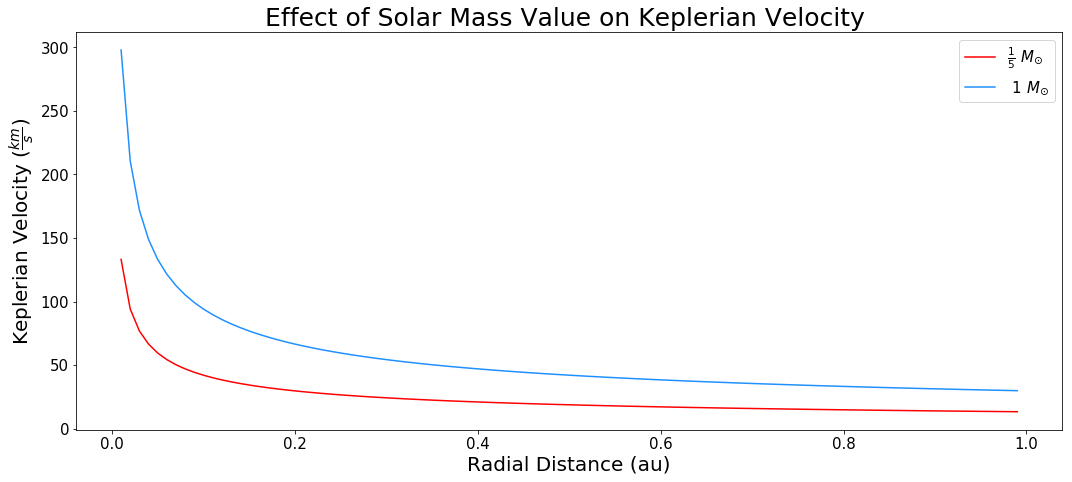

In [13]:
plt.figure(figsize=(15,7))

plt.plot(radius_range,not_so_full_sun, color='red', linestyle='-', label = r'$\frac{1}{5}$ $M_{\odot}$')
plt.plot(radius_range,full_sun,color='dodgerblue',linestyle='-', label=' 1 $M_{\odot}$')
#plt.plot(radius_range,mega_full_sun, color='limegreen', linestyle='-', label = ' 5 $M_{\odot}$')

plt.ylabel(r'Keplerian Velocity $(\frac{km}{s})$', fontsize=20)
plt.xlabel(r'Radial Distance (au)', fontsize=20)

plt.legend(loc='best', fontsize=15)
plt.tick_params(axis='both',labelsize=15)

plt.title('Effect of Solar Mass Value on Keplerian Velocity ', fontsize=25)

plt.tight_layout()
plt.subplots_adjust(top=.9)

plt.savefig('Orbit_Plot.pdf')

files.download('Orbit_Plot.pdf')

In [14]:
print('Speed of Earth at 1 AU: ', np.round(full_sun[-1]), 'km/s')

Speed of Earth at 1 AU:  30.0 km/s
